# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [237]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")

In [238]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [239]:
# количество пропусков в каждом признаке

df.isna().sum() / len(df)

CustomerID                0.000
Genre                     0.095
Age                       0.100
Annual Income (k$)        0.100
Spending Score (1-100)    0.000
dtype: float64

3 признака имеют около 10% пропусков

In [240]:
df["Genre"].value_counts()

Female     102
Male        77
Feemale      2
Name: Genre, dtype: int64

Два объекта имеют некорректное значение признака Genre

Text(0.5, 0, 'Age')

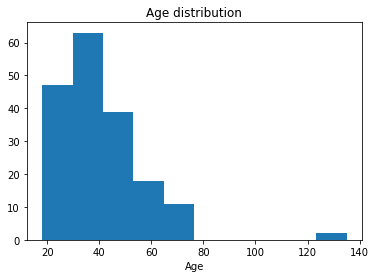

In [241]:
# распределения признаков

import matplotlib.pyplot as plt


plt.hist(df["Age"])
plt.title("Age distribution")
plt.xlabel("Age")

<AxesSubplot:>

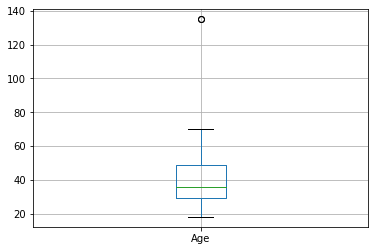

In [242]:
df.boxplot(column="Age")

В распределении возраста наблюдается выброс в виде покупателей с возрастом более 120 лет.

Text(0.5, 0, 'Annual Income (k$)')

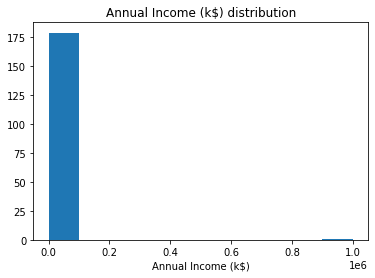

In [243]:
plt.hist(df["Annual Income (k$)"])
plt.title("Annual Income (k$) distribution")
plt.xlabel("Annual Income (k$)")

<AxesSubplot:>

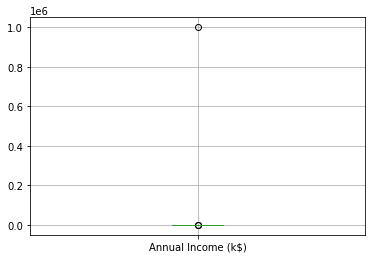

In [244]:
df.boxplot(column="Annual Income (k$)")

В распределении годового дохода наблюдается аномалия в виде дохода, значительно превышающего доход большинства покупателей.

Text(0.5, 0, 'Spending Score (1-100)')

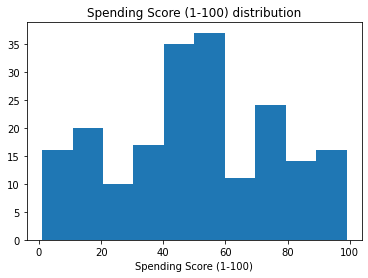

In [245]:
plt.hist(df["Spending Score (1-100)"])
plt.title("Spending Score (1-100) distribution")
plt.xlabel("Spending Score (1-100)")

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [246]:
from sklearn.model_selection import train_test_split

X = df.drop(['Spending Score (1-100)'], axis=1)
y = df['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [247]:
# Genre

# заменим некорректные значения Genre
X_train['Genre'] = X_train['Genre'].replace('Feemale', 'Female')

# пропуски заполним наиболее часто встречающимся значением
X_train['Genre'].fillna(X_train['Genre'].mode()[0], inplace=True)

In [248]:
# Age

# пропуски в Age заполним медианным значением, поскольку в выборке есть выбросы, 
# которые могут сильно повлиять на среднее значение

X_train['Age'].fillna(X_train['Age'].median(), inplace=True)

In [249]:
# Annual Income (k$)

# пропуски в Annual Income (k$) также заполним медианным значением

X_train['Annual Income (k$)'].fillna(X_train['Annual Income (k$)'].median(), inplace=True)

In [250]:
X_train.isna().sum() / len(X_train)

CustomerID            0.0
Genre                 0.0
Age                   0.0
Annual Income (k$)    0.0
dtype: float64

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


<AxesSubplot:>

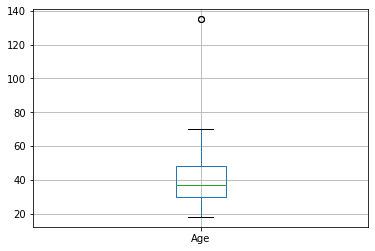

In [251]:
X_train.boxplot(column="Age")

In [252]:
# в признаке Age есть выброс в виде покупателей с возрастом более 120 лет
# найдем все выбросы за пределами полуторного межквартильного расстояния

def find_boundaries(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25
    
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries


bounds = find_boundaries(X_train['Age'])
bounds

(3.0, 75.0)

In [253]:
len(X_train[(X_train['Age'] < bounds[0]) | (X_train['Age'] > bounds[1])]) / len(X_train)

0.0125

In [254]:
# выбросы занимают незначительную часть выборки, удалим их

X_train = X_train[(X_train['Age'] >= bounds[0]) & (X_train['Age'] <= bounds[1])]

In [255]:
bounds1 = find_boundaries(X_train['Annual Income (k$)'])
bounds1

(5.625, 116.625)

In [256]:
len(X_train[(X_train['Annual Income (k$)'] < bounds1[0]) | (X_train['Annual Income (k$)'] > bounds1[1])]) / len(X_train)

0.03164556962025317

In [257]:
# также удалим выбросы для Annual Income

X_train = X_train[(X_train['Annual Income (k$)'] >= bounds1[0]) & (X_train['Annual Income (k$)'] <= bounds1[1])]

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


Text(0.5, 0, 'Age')

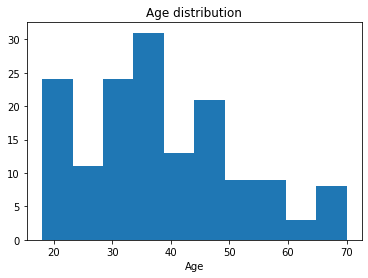

In [258]:
plt.hist(X_train["Age"])
plt.title("Age distribution")
plt.xlabel("Age")

Text(0.5, 0, 'Annual Income (k$)')

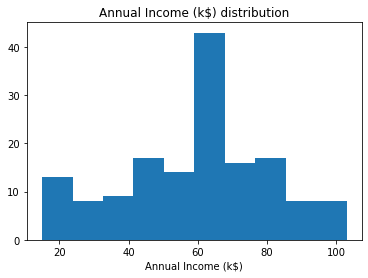

In [259]:
plt.hist(X_train["Annual Income (k$)"])
plt.title("Annual Income (k$) distribution")
plt.xlabel("Annual Income (k$)")

In [260]:
# распределение Annual Income (k$) близко к нормальному
# приведем данный признак к стандартному нормальному распределению

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train[['Annual Income (k$)']])
X_train['Annual Income (k$)'] = pd.DataFrame(X_train_s, columns=['Annual Income (k$)'], index=X_train.index)

In [261]:
# для признака Age воспользуемся min max нормализацией

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

X_train_mm = mmscaler.fit_transform(X_train[['Age']])
X_train['Age'] = pd.DataFrame(X_train_mm, columns=['Age'], index=X_train.index)

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [262]:
X_train['Genre'].value_counts()

Female    89
Male      64
Name: Genre, dtype: int64

In [263]:
# поскольку имеем всего две категории, закодируем данный признак 0 и 1

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')

ft = ohe.fit_transform(X_train[['Genre']])
X_train['Genre'] = pd.DataFrame(ft, columns=['Genre'], index=X_train.index)

In [264]:
X_train

,CustomerID,Genre,Age,Annual Income (k$)
108,109,1.0,0.961538,0.193085
107,108,1.0,0.692308,0.193085
189,190,0.0,0.346154,2.092893
14,15,1.0,0.365385,-1.849208
56,57,0.0,0.634615,-0.709324
...,...,...,...,...
133,134,0.0,0.250000,0.620542
137,138,1.0,0.269231,0.668037
72,73,0.0,0.807692,-0.424353
140,141,0.0,0.750000,0.763027


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [265]:
# пропуски

X_test['Genre'] = X_test['Genre'].replace('Feemale', 'Female')
X_test['Genre'].fillna(X_test['Genre'].mode()[0], inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test['Annual Income (k$)'].fillna(X_test['Annual Income (k$)'].median(), inplace=True)

X_test.isna().sum() / len(X_test)

CustomerID            0.0
Genre                 0.0
Age                   0.0
Annual Income (k$)    0.0
dtype: float64

In [266]:
# выбросы 

X_test = X_test[(X_test['Age'] >= bounds[0]) & (X_test['Age'] <= bounds[1])]
X_test = X_test[(X_test['Annual Income (k$)'] >= bounds1[0]) & (X_test['Annual Income (k$)'] <= bounds1[1])]

In [267]:
# нормализация

scaler = StandardScaler()
X_test_s = scaler.fit_transform(X_test[['Annual Income (k$)']])
X_test['Annual Income (k$)'] = pd.DataFrame(X_test_s, columns=['Annual Income (k$)'], index=X_test.index)


mmscaler = MinMaxScaler()
X_test_mm = mmscaler.fit_transform(X_test[['Age']])
X_test['Age'] = pd.DataFrame(X_test_mm, columns=['Age'], index=X_test.index)

In [268]:
# категориальные признаки

ohe = OneHotEncoder(sparse=False, drop='first')
ft = ohe.fit_transform(X_test[['Genre']])
X_test['Genre'] = pd.DataFrame(ft, columns=['Genre'], index=X_test.index)

In [270]:
X_test.head()

,CustomerID,Genre,Age,Annual Income (k$)
58,59,0.0,0.130435,-0.477968
40,41,0.0,0.956522,-0.803757
34,35,0.0,0.608696,-1.007376
102,103,1.0,1.000000,0.173612
184,185,0.0,0.434783,1.680389
